In [15]:
# Import the libraries

import numpy as np
import pandas as pd

# Load the Iris data set
from sklearn.datasets import load_iris

In [2]:
# calling the load_iris function

iris_dataset = load_iris()

#### DATA EXPLORATION

In [3]:
# Take a look at the dataset
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

- Observe that what is returned is a dictionary (key:value pairs) containing various information that we can return

In [4]:
# Print the keys 

print(f"Keys of Iris_dataset: {iris_dataset.keys()}")

Keys of Iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
# Print the values in the target variable

print(f"Target names are: {iris_dataset['target_names']}")

Target names are: ['setosa' 'versicolor' 'virginica']


In [ ]:
# print the shape of the iris dataset features

print(f"The shape of the Iris Dataset Features is {iris_dataset['data'].shape}")

The shape of the Iris Dataset is (150, 4)


In [8]:
# print the shape of the iris dataset target

print(f"The shape of the target column is: {iris_dataset['target'].shape}")

The shape of the target column is: (150,)


In [9]:
# Split the dataset into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=5)

In [10]:
# have a look at the shape of the each sets

print(f"The shape of X_train is {X_train.shape}")
print(f"The shape of X_test is: {X_test.shape}")
print(f"The shape of y_train is {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of X_train is (112, 4)
The shape of X_test is: (38, 4)
The shape of y_train is (112,)
The shape of y_test is: (38,)


- From the shape, we can see that the default train size is `75%` which is a good one.

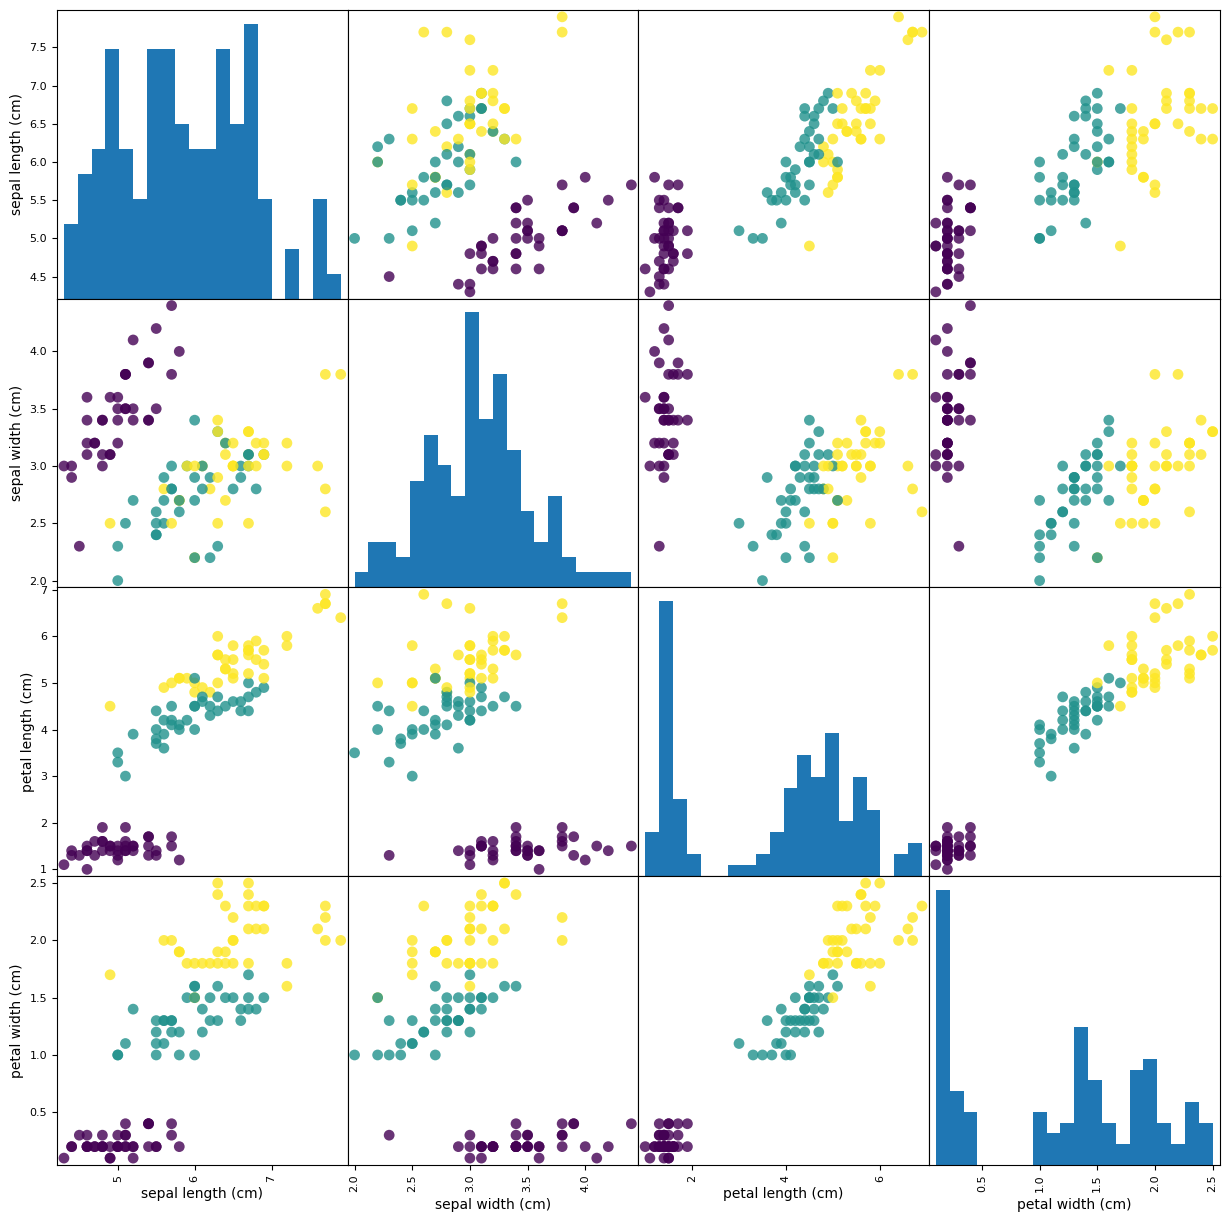

In [ ]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), 
                                 marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)

#### MODEL TRAINING

In [13]:
# Import the classifier library

from sklearn.neighbors import KNeighborsClassifier

# Instantiate the classifier object
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
# Fit the dataset to the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
# create new array for prediction
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f"X_new.shape: {X_new.shape}")

# making prediction with the fitted model
iris_pred = knn.predict(X_new)
print(f"The predicted value is: {iris_pred}")
print(f"The predicted category is: {iris_dataset['target_names'][iris_pred]}")

X_new.shape: (1, 4)
The predicted value is: [0]
The predicted category is: ['setosa']


#### MODEL EVALUATION

In [19]:
# make predictions of the X_test

y_pred = knn.predict(X_test)

# print the predictions
print(f"The predictions for X_test are {y_pred}")

The predictions for X_test are [1 2 2 0 2 1 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 2 1 2 1 1 1 2 0 1 1 0 1 0 0
 2]


In [25]:
# print the model accuracy on test set

print(f"The Model accuracy on the test set is: {np.mean(y_pred == y_test):.2f}")


# we can also use the knn.score method to print the accuracy
print('------------------------------------------')
print(f"The Model accuracy on the test set is: {knn.score(X_test, y_test):.2f}")

The Model accuracy on the test set is: 0.92
------------------------------------------
The Model accuracy on the test set is: 0.92


- For this model, the test set accuracy is about 0.92, which means we made the right
prediction for 92% of the irises in the test set.